In [1]:
import numpy as np
import numba as nb
import matplotlib.pyplot as plt
import ODESolve as ODE
import ODESolve_slow as ODEslow
import derivatives as der

In [2]:
#initial conditions, thermal distribution od ve, zero vm

In [4]:
N=100
Emax= 10
dm2= 2
th= .5*np.arcsin(.8)

Eval= np.linspace(Emax/N, Emax, N)

ym0= np.zeros((N,4))
for i in range(len(ym0)):
    p0= 1/(np.exp(Eval[i])+1)
    ym0[i,:]= [p0,0,0,1]


p= np.zeros(N+2)
p[-1]= dm2
p[-2]= th
p[:N]= np.linspace(Emax/N, Emax, N)

In [5]:
def matrix_maker(y):
    length= len(y)
    matrix = np.zeros((length//4,4))
    
    for i in range(matrix.shape[0]):
        for j in range(4):
            matrix[i,j]= y[4*i+j]
    return matrix


def array_maker(M):
    length= M.shape[0]
    array = np.zeros(length*4)
    
    for i in range(M.shape[0]):
        for j in range(4):
            array[4*i+j] = M[i,j]
            
    return array  

def threeD(y):
    d= matrix_maker(y[0,:])
    matrix= np.zeros((y.shape[0], d.shape[0], 4))
                    
    for i in range(y.shape[0]):
        matrix[i,:,:]= matrix_maker(y[i,:])
    
    return matrix



def dndE(ym0, Eval):
    array= np.zeros(N)
    for i in range(len(array)):
        p0= ym0[i,0]
        E= Eval[i]
        pz= ym0[i, 3]
        array[i]= .5* p0*(1+pz)*(E**2/2*np.pi**2)
        
    return array

y0= array_maker(ym0)
t0= 0

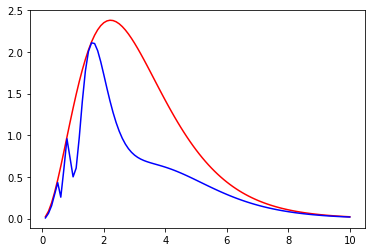

In [20]:
t0= 0
y0= array_maker(ym0)
t0= 0
dt0=  0.01/.8
N_step = 100               
dN = 100
t_final = 10 


t, y, dx, end = ODE.ODEOneRun(t0, y0, dt0, p, N_step, dN, t_final)

resultsMatrix= threeD(y)
ics= dndE(resultsMatrix[0, :, :], Eval)
later= dndE(resultsMatrix[10, :, :], Eval)


plt.figure()
plt.plot(Eval, ics, color= 'red')
plt.plot(Eval, later, color= 'blue')
plt.show()